<a href="https://colab.research.google.com/github/prievarag/Red_Wine_quality/blob/main/Red_wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let's practice overfitting with the famous red winequality dataset. 

This dataset has 11 attributes that decide th quality of red wine.
      
1. fixed acidity,
2. volatile acidity,
3. citric acid,
4. residual sugar,
5. chlorides,
6. free sulfur dioxide,
7. total sulfur dioxide,
8. density,	
9. pH,
10. sulphates,
11. alcohol


In [25]:
import pandas as pd
df = pd.read_csv("winequality-red.csv")

In [26]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


As we can see, wine quality is a real number, let's see how many types of qulaity values consists the dataset:

In [27]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [28]:
#mapping dictionary
quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}
#Now we use pandas map function to convert the values of this dictionary to 
#the quality column
df.loc[:, "quality"]=df.quality.map(quality_mapping)

In [29]:
df.shape

(1599, 12)

In [30]:
#Let's divide the data into two parts
#we keep 1000 samples for training and 599 as a separate set
df = df.sample(frac=1).reset_index(drop=True)
#top 1000 rows for training
df_train = df.head(1000)
#bottom 599  rows for test / validation
df_test = df.tail(599)

# Decision Tree model

In [31]:
from sklearn import tree
from sklearn import metrics
#initializing decision tree classifier class with max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=7)

#choose columns we want to train on
cols=["fixed acidity",
      "volatile acidity",
      "citric acid",
      "residual sugar",
      "chlorides",
      "free sulfur dioxide",
      "total sulfur dioxide",
      "density",	
      "pH",
      "sulphates",
      "alcohol"]

#train the model on the provided features and mapped quality from before
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=7)

In [32]:
#predicitons for the training set
train_predictions = clf.predict(df_train[cols])

#predictions for the test set
test_predictions = clf.predict(df_test[cols])

In [33]:
#accuracy
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)                      

In [34]:
print(train_accuracy, test_accuracy)

0.779 0.6010016694490818


# NOW WE WILL CALCULATE ACCURACY FOR DIFFERENT VALUES OF max_depth AND MAKE A PLOT!

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

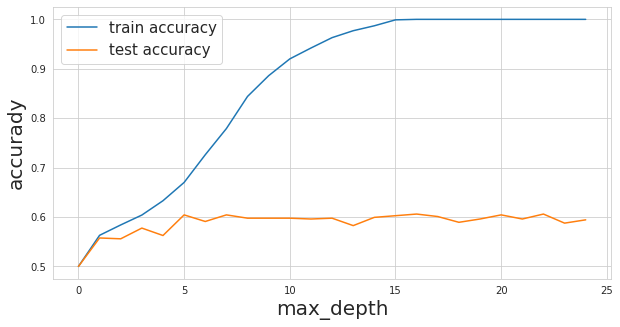

In [36]:
#initialize lists to store accuracies for training and test data
#we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

for depth in range (1,25):
  clf = tree.DecisionTreeClassifier(max_depth=depth)
  clf.fit(df_train[cols], df_train.quality)
  train_predictions = clf.predict(df_train[cols])
  test_predictions = clf.predict(df_test[cols])
  train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
  test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)

#create two plots usint matplotlib and seaborn
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={"size": 15})
plt.xticks(range(0,26,5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accurady", size=20)
plt.show()

Text(0, 0.5, 'count')

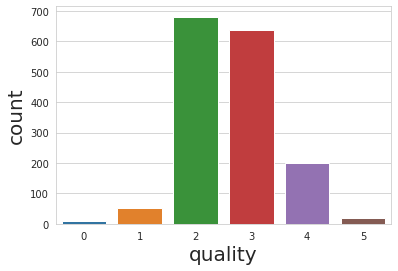

In [37]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)